교수님께서 기존 데이터셋 (A)을 이용하여 모델링을 진행하고, 나중에 기존 데이터셋을 변경한 데이터셋(B)의 성능을 비교하라고 하셨습니다.

그래서 기존 데이터셋 (A: 신규노선 항공운임예측, 독일 신용평가 자료 둘 다 포함) Phase 1 도 진행하고 변경된 데이터셋 (B: 교수님께서 주신 새로운 신규노선 항공운임예측, 독일 신용평가 자료 둘 다 포함) Phase 1 도 진행했습니다! 이 점 참고 부탁드립니다.

*수정 사항: 기존 데이터셋으로 신규노선 항공운임예측 & 독일신용평가 자료 phase 1을 진행한다는게 변경된 데이터셋으로 해버려서 다시 제대로 된 파일로 했습니다! ㅠㅜㅠ

# 1. 기존 데이터셋 Phase 1-프로젝트 준비 및 탐색
# 신규노선 항공운임예측

# **1. 프로젝트 정의 및 목표 설정**

① 문제 정의


본 프로젝트는 항공 운임(FARE)을 예측하는 회귀 분석 문제로 설정한다. 항공 요금은 도시 간 거리(DISTANCE), 출발 및 도착지의 인구수(S_POP, E_POP), 소득(S_INCOME, E_INCOME), 항공편 특성(COUPON, NEW, VACATION, SW, HI, SLOT, GATE), 여객 수(PAX) 등 다양한 요인에 의해 결정될 수 있으며, 이를 정량적으로 모델링하여 향후 운임 수준을 예측하고자 한다.



② 데이터 정의


데이터 출처: Airfares.csv

관측치 수: 638개

주요 변수:

출발지 및 도착지: S_CODE, S_CITY, E_CODE, E_CITY

항공편 특성: COUPON, NEW, VACATION, SW, HI

인구 및 소득: S_POP, E_POP, S_INCOME, E_INCOME

항공사 운영조건: SLOT, GATE

거리 및 여객 수: DISTANCE, PAX

종속변수(Target): FARE (항공 요금, 연속형 변수)



③ 성공 지표 설정

회귀 모델의 성능 평가지표로는 RMSE (Root Mean Squared Error) 또는 MAE (Mean Absolute Error)를 사용한다.

성공 기준: RMSE가 30 이하이거나, MAE가 25 이하일 경우 프로젝트 성과가 양호한 것으로 판단한다.



④ 기대 효과 및 제약 조건

기대 효과: 항공사 또는 여행 플랫폼에서 고객 맞춤 운임 예측, 가격 책정 전략 수립 등에 활용 가능.



제약 조건:

비교적 소규모 데이터셋(638개 샘플)으로 인해 과적합 위험 존재

일부 범주형 변수의 해석 및 인코딩 방식에 따라 모델 성능 차이가 발생할 수 있음

외부 요인(기상, 정책, 이벤트 등)이 데이터에 포함되지 않음

# **2. 데이터 수집 및 로드**

In [ ]:
# 1. 파일 업로드
from google.colab import files
uploaded = files.upload()

# 2. pandas 라이브러리 불러오기
import pandas as pd

# 3. CSV 파일 로드 (파일 이름이 다를 경우 적절히 수정 필요)
df = pd.read_csv('Airfares.csv')

# 4. 데이터프레임 기본 정보 출력
print("✅ 데이터 기본 정보:")
print(df.info())
print("\n✅ 데이터 상위 5행:")
print(df.head())
print("\n✅ 기술통계 요약:")
print(df.describe(include='all'))


Saving Airfares.csv to Airfares.csv
✅ 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB
Non

로드된 데이터는 총 638개의 행과 18개의 열로 구성되어 있으며, 각 열은 출발지/도착지 정보, 인구 및 소득, 항공편 특성, 거리, 여객 수, 요금 등의 변수로 이루어져 있다. df.info()와 df.describe() 함수를 통해 데이터 타입과 결측치 유무, 변수별 기초 통계값을 확인하였다. 전체적으로 결측치는 존재하지 않으며, 수치형 및 범주형 변수가 혼합된 구조를 가지고 있음을 파악하였다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# 수치형 데이터만 추출하여 요약 통계 확인
df.describe()


,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


총 10개의 수치형 변수에 대해 요약 통계를 확인하였다.

FARE의 평균은 160.88, 중앙값은 144.60으로 **우측에 긴 꼬리 분포(Positive Skew)**가 있음.

표준편차는 76.02로, 분산이 크고 다양한 요금대가 존재함.

PAX(여객 수)의 최대값은 73,892명으로, 다른 평균 값에 비해 매우 높아 이상치 존재 가능성을 시사함.

In [ ]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())



📌 S_CODE 고유값 및 빈도수:
S_CODE
*      454
ORD     45
MDW     45
EWR     30
JFK     29
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY 고유값 및 빈도수:
S_CITY
Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Detroit             MI    22
Denver              CO    22
Houston             TX    20
Orlando             FL    15
Phoenix             AZ    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Miami               FL    11
Fort Lauderdale     FL    11
Kansas City         MO    11
Austin              TX    10
Cleveland           OH    10
Columbus            OH    10
San Diego           CA     9
Albuquerque         NM     9
San Francisco       CA     8
Burbank             CA     7
New Orleans         LA     7
Cincinnati          OH     6
Philadelphia/Camden PA     6
Oakland             CA     6
Washington        

VACATION: No가 468건으로 대부분, Yes는 170건으로 소수

SW: No가 444건, Yes가 194건

S_CITY, E_CITY: 출발지는 51개 도시, 도착지는 68개 도시로 다양한 항공편 조합을 가짐

SLOT, GATE: Free, Controlled로 나뉘며, Free가 각각 456건, 514건으로 많음

In [ ]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)


          Missing Count  Missing Ratio (%)
S_CODE                0                0.0
S_CITY                0                0.0
E_CODE                0                0.0
E_CITY                0                0.0
COUPON                0                0.0
NEW                   0                0.0
VACATION              0                0.0
SW                    0                0.0
HI                    0                0.0
S_INCOME              0                0.0
E_INCOME              0                0.0
S_POP                 0                0.0
E_POP                 0                0.0
SLOT                  0                0.0
GATE                  0                0.0
DISTANCE              0                0.0
PAX                   0                0.0
FARE                  0                0.0


모든 변수에서 결측치는 0건이며, Missing Ratio(%) = 0.0

추가적인 결측치 처리나 보간은 불필요하며, 데이터 품질이 우수함

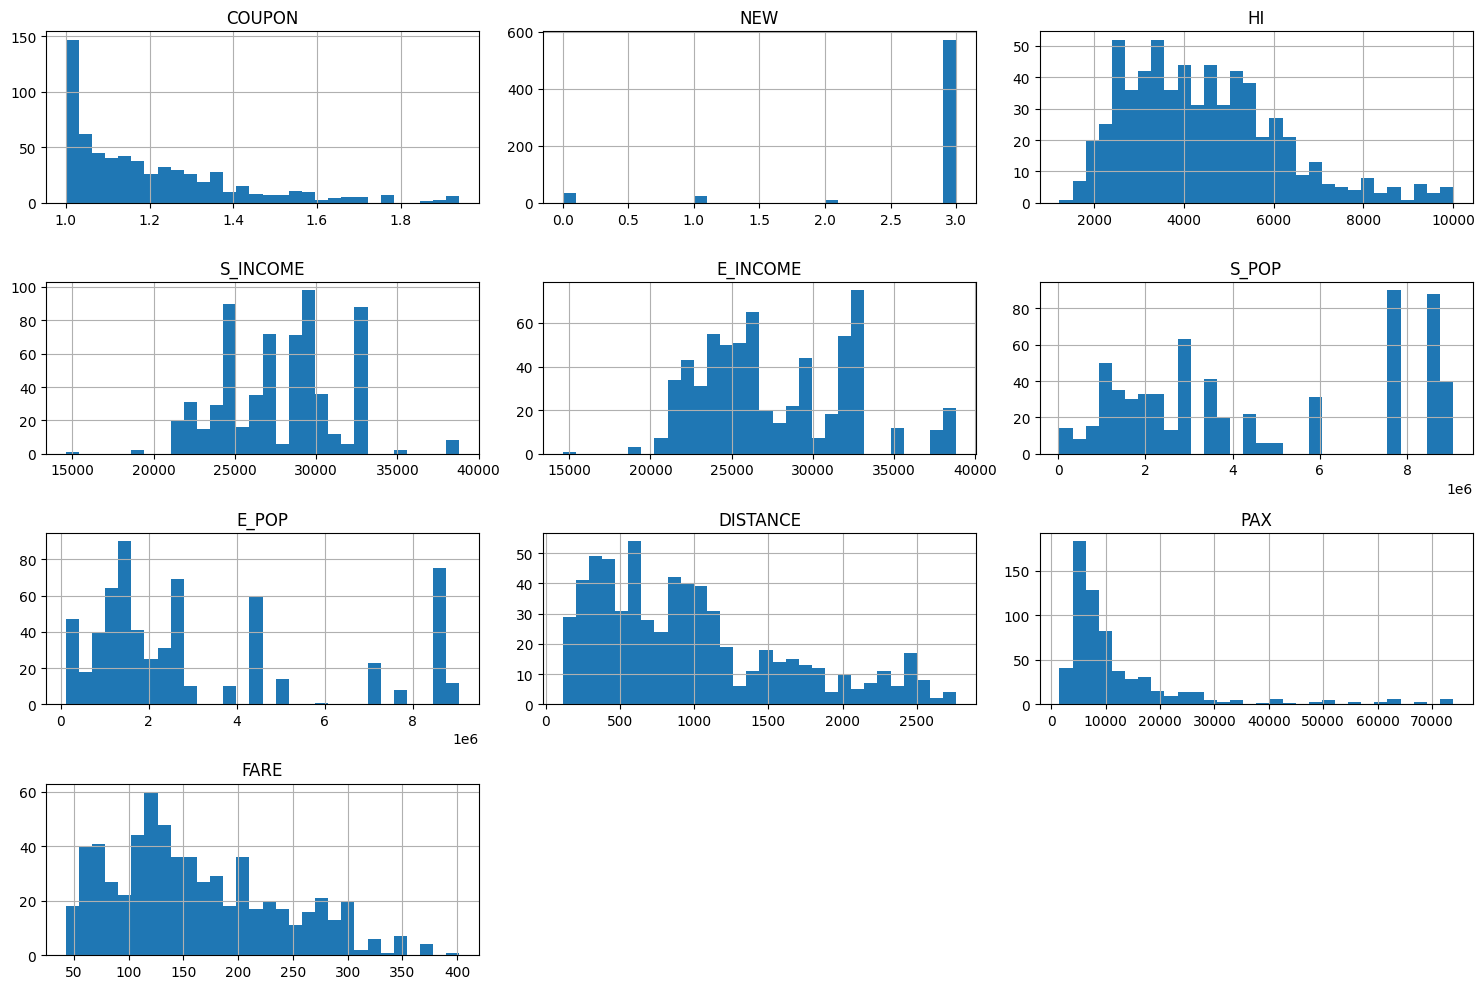

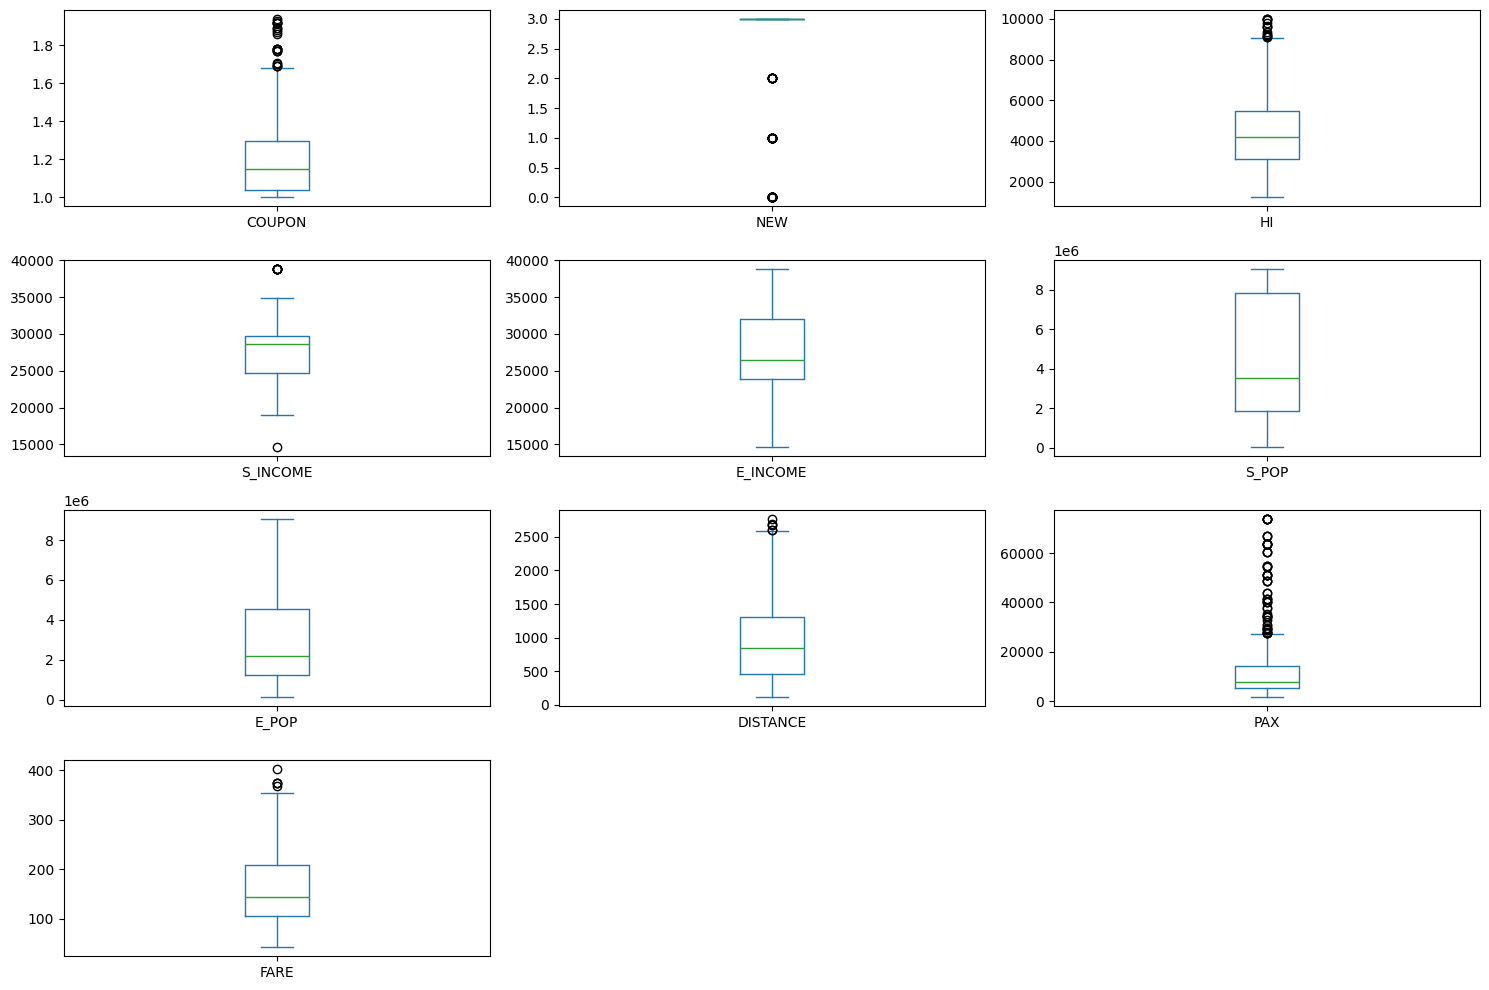

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()


FARE, HI, PAX 등 일부 변수에서 길게 뻗은 꼬리와 이상치 점들이 확인됨

특히 PAX는 7만 명을 초과하는 극단값으로, 스케일 조정이나 이상치 제거 필요성 존재

HI는 최대 10,000 이상으로 극단적으로 높은 값이 분포되어 있음

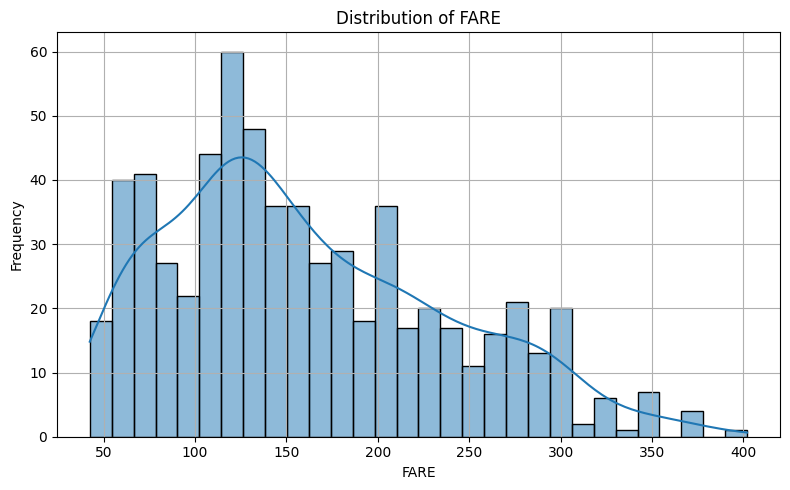

In [ ]:
import seaborn as sns

# 타겟 변수 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df['FARE'], bins=30, kde=True)
plt.title("Distribution of FARE")
plt.xlabel("FARE")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



FARE 분포는 정규분포가 아닌 비대칭 분포이며, 오른쪽 꼬리가 긴 분포를 보임

평균보다 높은 고가 항공 요금이 일부 존재하며, 예측 모델의 정밀도를 위해 로그 변환 등의 정규화가 필요할 수 있음

KDE곡선으로 보면 대부분의 요금은 100~200달러에 집중되어 있음

# 1. 기존 데이터셋 Phase 1-프로젝트 준비 및 탐색


# 독일 신용평가 자료


# **1. 프로젝트 정의 및 목표 설정**

① 문제 정의


본 프로젝트는 개인 신용 데이터를 바탕으로 신용 승인 가능성(Response 변수) 을 예측하는 이진 분류 문제이다.

RESPONSE 변수는 고객의 신용 승인 여부를 나타내며, 1은 승인, 0은 거절을 의미한다.

모델은 고객 특성(소득, 직업, 신용 이력, 부양가족 수 등)을 바탕으로 향후 고객의 신용 승인 가능성을 예측하는 데 사용될 수 있다.



② 데이터 정의


데이터 출처: German Credit 데이터셋 (파일명: GermanCredit.csv)

관측치 수: 1,000건

변수 수: 32개 (설명변수 31개, 타겟 변수 1개)

주요 변수:

DURATION, AMOUNT, AGE, EMPLOYMENT: 수치형 특성

CHK_ACCT, SAV_ACCT, JOB, REAL_ESTATE, FOREIGN, MALE_SINGLE, NEW_CAR, USED_CAR, 등: 이진 및 범주형 특성

RESPONSE: 타겟 변수, 이진형 (0 또는 1)



③ 성공 지표 설정


본 문제는 이진 분류 문제로, 다음과 같은 평가 지표를 사용한다:

정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 Score

불균형 데이터일 가능성을 고려해 F1 Score 0.75 이상을 프로젝트 목표 기준으로 설정한다.



④ 기대 효과 및 제약 조건


기대 효과:

금융기관에서 신용 승인 여부를 사전 예측함으로써 리스크 최소화 및 업무 효율성 제고

고위험 고객을 사전 분류함으로써 부실 채권 비율 감소



제약 조건:

변수 간 상관관계 및 다중공선성 존재 가능성

일부 이진 변수들의 해석상 의미가 불명확하거나 도메인 지식 부족

불균형 데이터로 인해 모델 성능이 왜곡될 수 있음

# **2. 데이터 수집 및 로드**

In [ ]:
# 1. 파일 업로드
from google.colab import files
uploaded = files.upload()

# 2. pandas 라이브러리 불러오기
import pandas as pd

# 3. CSV 파일 로드 (파일명은 업로드한 실제 파일명에 맞춰 수정)
df = pd.read_csv('GermanCredit (1).csv')

# 4. 데이터프레임 기본 정보 출력
print("✅ 데이터 크기 (행, 열):", df.shape)
print("\n✅ 컬럼명 목록:")
print(df.columns.tolist())
print("\n✅ 데이터 타입 및 결측치 여부:")
print(df.info())


Saving GermanCredit (1).csv to GermanCredit (1).csv
✅ 데이터 크기 (행, 열): (1000, 32)

✅ 컬럼명 목록:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입 및 결측치 여부:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   

총 1,000개의 관측치와 32개의 변수가 포함되어 있으며, 모든 변수는 int64 형식으로 구성되어 있다. df.info() 결과에 따르면 결측치는 존재하지 않으며, 데이터 구조가 깔끔하게 정리되어 있음을 확인하였다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# 수치형 변수 요약 통계
df.describe()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


주요 연속형 변수인 DURATION, AMOUNT, AGE 등에 대해 평균, 표준편차, 최소값, 최대값 등을 확인함.


예를 들어:

DURATION의 평균은 약 20.9개월, 최대값은 72개월

AMOUNT의 평균은 약 3,270.1, 최대값은 18,424로 큰 편차가 존재

AGE는 19세부터 75세까지 분포하며, 평균은 35.5세

In [ ]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.columns[df.nunique() <= 10]
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())



📌 CHK_ACCT 고유값 및 빈도수:
CHK_ACCT
3    394
0    274
1    269
2     63
Name: count, dtype: int64

📌 HISTORY 고유값 및 빈도수:
HISTORY
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64

📌 NEW_CAR 고유값 및 빈도수:
NEW_CAR
0    766
1    234
Name: count, dtype: int64

📌 USED_CAR 고유값 및 빈도수:
USED_CAR
0    897
1    103
Name: count, dtype: int64

📌 FURNITURE 고유값 및 빈도수:
FURNITURE
0    819
1    181
Name: count, dtype: int64

📌 RADIO/TV 고유값 및 빈도수:
RADIO/TV
0    720
1    280
Name: count, dtype: int64

📌 EDUCATION 고유값 및 빈도수:
EDUCATION
0    950
1     50
Name: count, dtype: int64

📌 RETRAINING 고유값 및 빈도수:
RETRAINING
0    903
1     97
Name: count, dtype: int64

📌 SAV_ACCT 고유값 및 빈도수:
SAV_ACCT
0    603
4    183
1    103
2     63
3     48
Name: count, dtype: int64

📌 EMPLOYMENT 고유값 및 빈도수:
EMPLOYMENT
2    339
4    253
3    174
1    172
0     62
Name: count, dtype: int64

📌 INSTALL_RATE 고유값 및 빈도수:
INSTALL_RATE
4    476
2    231
3    157
1    136
Name: count, dtype: int64

📌 MALE_DIV 고유값 및 빈도수:
MALE_DIV

RESPONSE, CHK_ACCT, HISTORY, JOB, FOREIGN, TELEPHONE 등 다양한 범주형 변수는 값의 범위가 좁고 이진 또는 4~5단계의 값으로 구성됨.


예시:

RESPONSE: 1이 700건, 0이 300건 → 데이터가 다소 불균형

CHK_ACCT: 0~3까지 4단계 값 분포

FOREIGN: 외국인 여부, 0(내국인)과 1(외국인)로 구분됨

In [ ]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)


                  Missing Count  Missing Ratio (%)
OBS#                          0                0.0
CHK_ACCT                      0                0.0
DURATION                      0                0.0
HISTORY                       0                0.0
NEW_CAR                       0                0.0
USED_CAR                      0                0.0
FURNITURE                     0                0.0
RADIO/TV                      0                0.0
EDUCATION                     0                0.0
RETRAINING                    0                0.0
AMOUNT                        0                0.0
SAV_ACCT                      0                0.0
EMPLOYMENT                    0                0.0
INSTALL_RATE                  0                0.0
MALE_DIV                      0                0.0
MALE_SINGLE                   0                0.0
MALE_MAR_or_WID               0                0.0
CO-APPLICANT                  0                0.0
GUARANTOR                     0

모든 변수에서 결측치 없음 → Missing Count = 0, Missing Ratio = 0.0%

추가적인 결측치 처리 불필요, 데이터 품질 양호

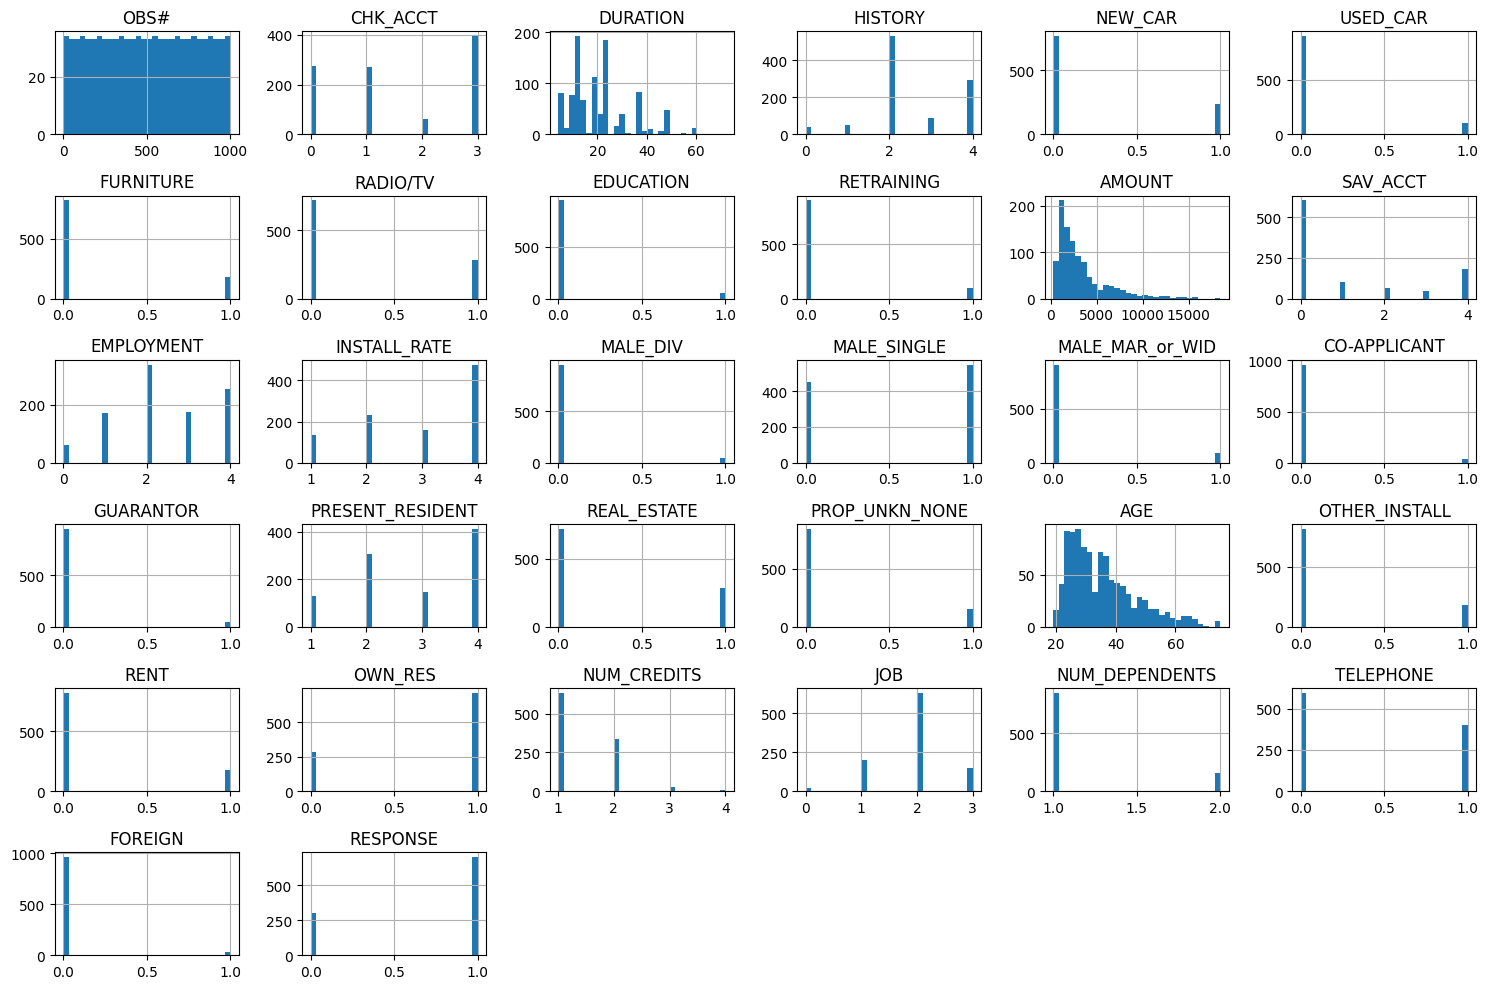

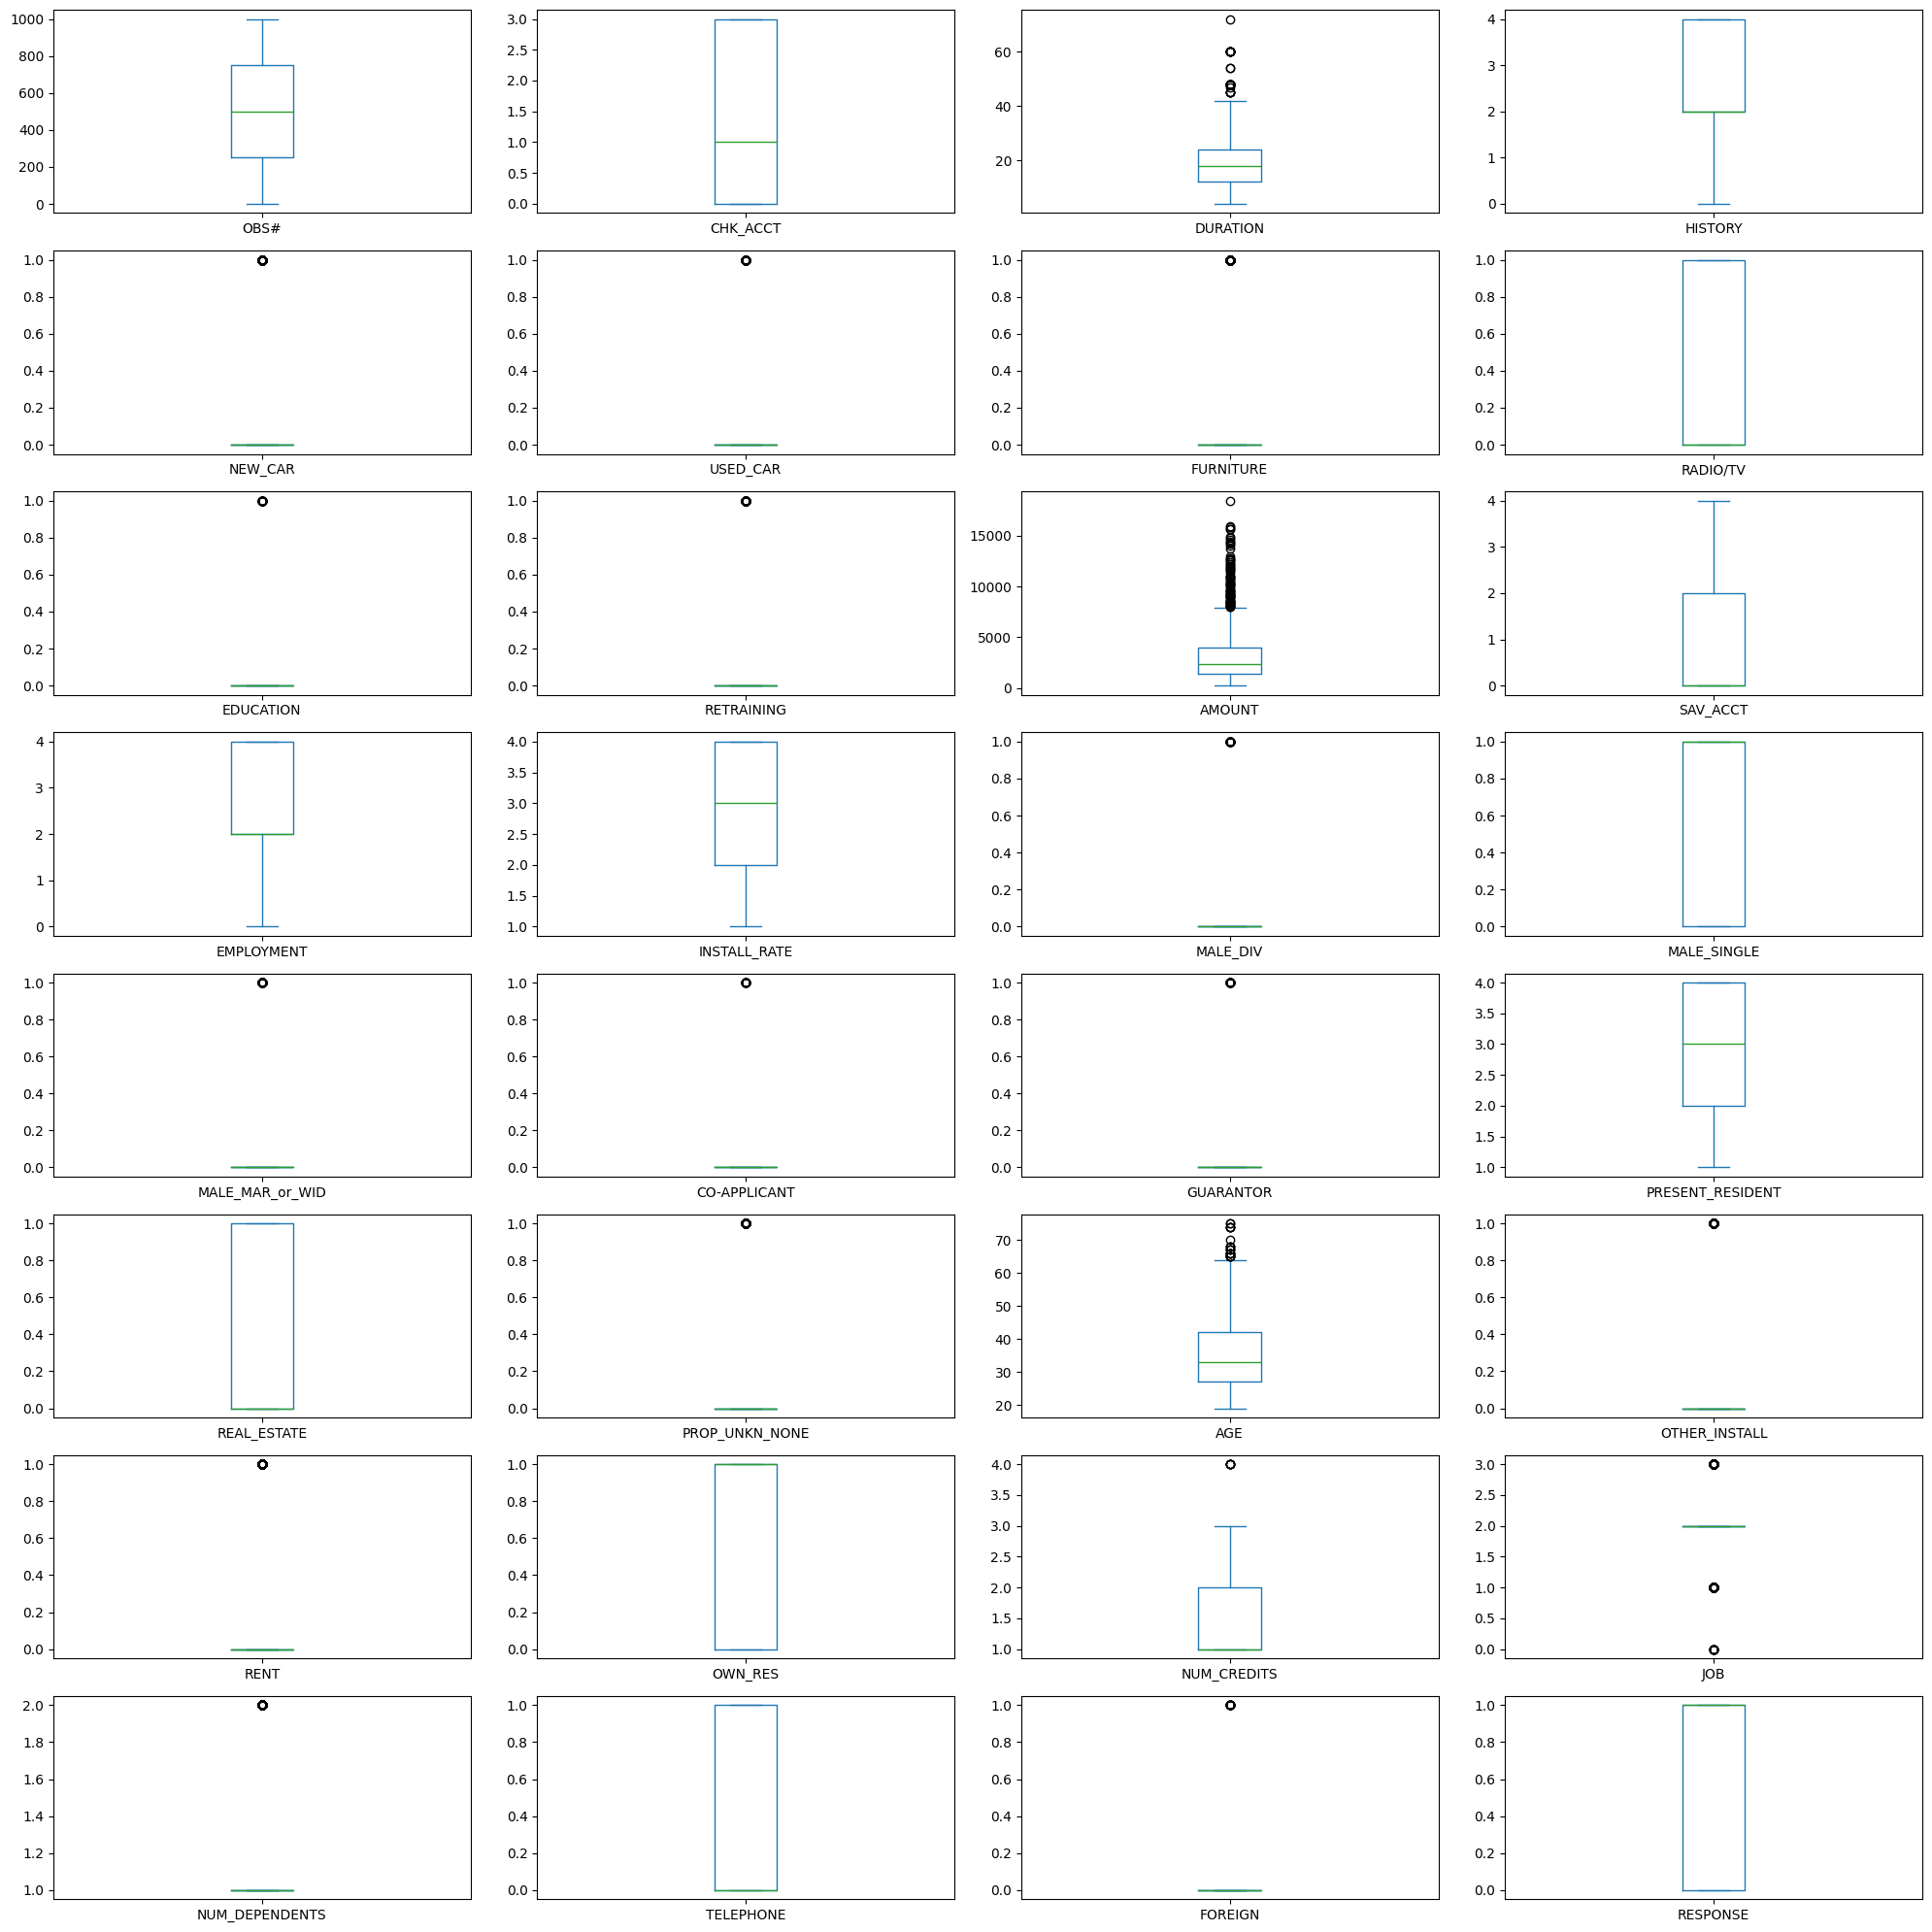

In [ ]:
# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(8, 4), figsize=(20, 20), sharex=False)
plt.tight_layout()
plt.show()


히스토그램 결과:


대부분의 변수는 이산형(0 또는 1) 또는 편중된 값 분포를 가짐

AMOUNT, DURATION, AGE는 연속적으로 분포되며 극단값 존재 가능성 있음



박스플롯 결과:

AMOUNT, AGE, DURATION 등에서 박스 밖에 위치한 이상치 점이 다수 확인됨

특히 AMOUNT는 상위 이상값의 범위가 매우 큼

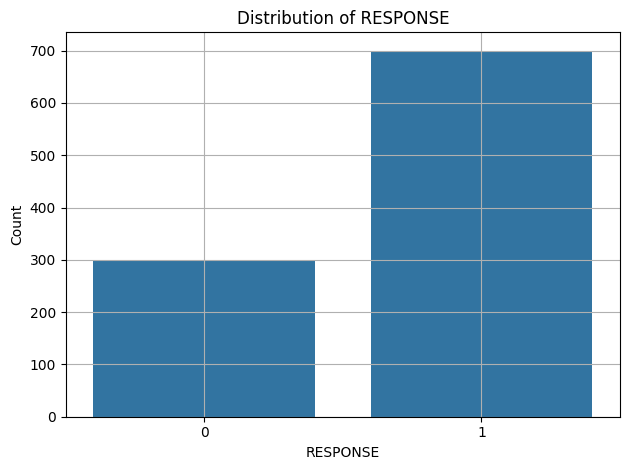

In [ ]:
# 타겟 변수(RESPONSE) 분포 시각화
sns.countplot(x='RESPONSE', data=df)
plt.title("Distribution of RESPONSE")
plt.xlabel("RESPONSE")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


RESPONSE = 1 (신용 승인): 700건 (70%)

RESPONSE = 0 (신용 거절): 300건 (30%)

→ 클래스 불균형 있음 → 모델 학습 시 F1 Score, Precision, Recall 등을 함께 고려해야 함

In [ ]:
# 왜도와 첨도 계산
skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)

# 결과 출력
print("📌 왜도 (Skewness):\n", skewness)
print("\n📌 첨도 (Kurtosis):\n", kurtosis)


📌 왜도 (Skewness):
 OBS#                0.000000
CHK_ACCT            0.006957
DURATION            1.094184
HISTORY            -0.011886
NEW_CAR             1.258466
USED_CAR            2.616121
FURNITURE           1.659555
RADIO/TV            0.981431
EDUCATION           4.135689
RETRAINING          2.727454
AMOUNT              1.949628
SAV_ACCT            1.016677
EMPLOYMENT         -0.117615
INSTALL_RATE       -0.531348
MALE_DIV            4.135689
MALE_SINGLE        -0.193181
MALE_MAR_or_WID     2.827519
CO-APPLICANT        4.636536
GUARANTOR           4.041610
PRESENT_RESIDENT   -0.272570
REAL_ESTATE         0.970403
PROP_UNKN_NONE      1.920051
AGE                 1.020739
OTHER_INSTALL       1.616379
RENT                1.677217
OWN_RES            -0.943140
NUM_CREDITS         1.272576
JOB                -0.374295
NUM_DEPENDENTS      1.909445
TELEPHONE           0.391868
FOREIGN             4.913027
RESPONSE           -0.874183
dtype: float64

📌 첨도 (Kurtosis):
 OBS#                

왜도(Skewness) 결과, AMOUNT, DURATION, AGE 변수는 모두 **양의 왜도(> 0)**를 보였다.

특히 AMOUNT는 왜도가 약 1.95로 오른쪽 꼬리가 길게 분포된 비대칭 형태임을 나타낸다.

이는 고액 대출 사례가 소수 존재함을 의미하며, 로그 변환 등의 정규화가 필요할 수 있다.


첨도(Kurtosis) 결과, AMOUNT는 첨도가 5.7로 **뾰족한 분포(Leptokurtic)**이며,
이는 평균 부근에 많은 값이 몰려 있고, 동시에 극단값(이상치)도 존재함을 의미한다.

반면 AGE, DURATION 등은 첨도가 3에 가까워 정규분포에 비교적 유사한 형태를 보인다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# 2. 변경된 데이터셋 Phase 1 -프로젝트 준비 및 탐색



# 신규노선 항공운임예측


# **1. 프로젝트 정의 및 목표 설정**

변경된 데이터셋 이름과 기존 데이터셋 이름이 똑같아서 변경된 데이터셋은 Airfares_simple_garbled2 라고 2를 붙여서 둘을 구분했습니다!



● 문제 정의 (Problem Definition)


본 프로젝트의 목적은 항공편 관련 정보(출발지, 도착지, 거리, 경유 수, 인구 수, 소득 등)를 바탕으로, 항공 운임(FARE)을 예측하는 회귀 모델을 개발하는 것이다.


해당 예측 모델은 향후 항공사나 여행 플랫폼에서 가격 책정 전략, 수요 예측, 사용자 맞춤 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)


프로젝트에는 두 가지 버전의 데이터셋이 사용된다.

첫 번째는 Airfares_simple_garbled.csv로, 원본 데이터를 기반으로 한다.

두 번째는 Airfares_simple_garbled2.csv로, 전처리나 변형이 가해진 수정된 데이터셋이다.


각 데이터셋은 약 600여 개의 항공편 샘플과 18개 변수로 구성되어 있으며, 주요 변수에는 거리(DISTANCE), 여객 수(PAX), 출도착지 인구 및 소득(S_POP, E_INCOME), 경유 횟수(COUPON), Southwest 항공 여부(SW) 등이 포함되어 있다.


● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 다음 지표를 기준으로 한다:

Root Mean Squared Error (RMSE) ≤ 40

Mean Absolute Error (MAE) ≤ 30
이는 항공 요금 예측이 비즈니스 의사결정에 의미 있는 정확도로 기여할 수 있는 수준으로 설정한 기준이다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:


고객에게 더 정확한 운임 정보 제공 가능

항공사 또는 플랫폼의 가격 전략 수립에 활용

경유 여부, 항공사, 거리 등 다양한 요인이 요금에 미치는 영향 분석 가능



제약 조건:


일부 변수의 데이터 오류 또는 결측치 존재

비정형 범주형 변수 처리 필요 (S_CITY, SW, VACATION 등)

수정된 데이터셋과의 공정한 비교를 위해 동일한 모델 구조 및 평가 방식 유지 필요

학습 데이터의 크기가 비교적 작아 복잡한 모델 적용에 제약이 있음

# **2. 데이터 수집 및 로드**

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

# Pandas로 데이터 불러오기
import pandas as pd

df2 = pd.read_csv('Airfares_simple_garbled2.csv')


# 데이터 기본 정보 확인
print("✅ 데이터 형태 (행, 열):", df2.shape)
print("\n✅ 컬럼명:")
print(df2.columns.tolist())
print("\n✅ 데이터 타입:")
print(df2.dtypes)

# 상위 5행 미리보기
df2.head()


Saving Airfares_simple_garbled2.csv to Airfares_simple_garbled2.csv
✅ 데이터 형태 (행, 열): (648, 18)

✅ 컬럼명:
['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX', 'FARE']

✅ 데이터 타입:
S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE    float64
PAX         float64
FARE        float64
dtype: object


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312.0,7864.0,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576.0,8820.0,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,NaN,29838.0,5787293,7145897,Free,Free,364.0,6452.0,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612.0,25144.0,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612.0,25144.0,85.47


변경된 데이터셋은 약 648개의 행과 18개의 열로 구성되어 있으며, 기존 데이터셋과 구조가 유사하다.


대부분의 변수는 수치형(float64, int64)과 범주형(object)으로 구성되어 있으며, FARE는 예측 대상인 연속형 변수이다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# ✅ 수치형 데이터 기술 통계량 확인
df2.describe()


,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,648.000000,648.000000,648.000000,616.000000,615.000000,6.480000e+02,6.480000e+02,617.000000,617.000000,648.000000
mean,1.201944,2.756173,4443.943380,27742.331169,27545.308943,4.561558e+06,3.190555e+06,1047.669368,12657.116694,158.158827
std,0.202933,0.755685,1722.601245,3590.301994,4609.631624,3.015805e+06,2.730106e+06,1267.277578,12917.285290,82.132518
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,-234.150000
25%,1.040000,3.000000,3095.872500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,450.000000,5275.000000,105.340000
50%,1.150000,3.000000,4208.185000,27994.000000,26409.000000,3.532657e+06,2.195215e+06,844.000000,7785.000000,143.440000
75%,1.300000,3.000000,5485.617500,29260.000000,31981.000000,7.830332e+06,4.549784e+06,1389.000000,14005.000000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,24440.000000,73892.000000,402.020000


FARE 변수는 평균 약 158, 최소값은 -234, 최대값은 402로 나타났으며, 음수 운임이 존재해 데이터 오류 가능성이 있다.

DISTANCE와 PAX도 최대값 기준으로 이상치가 포함되어 있을 수 있다.

In [ ]:
# ✅ 범주형 변수: 고유값 및 빈도수 확인
categorical_cols = df2.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())



📌 S_CODE (고유값 8개)
S_CODE
*      462
ORD     45
MDW     45
EWR     31
JFK     30
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY (고유값 64개)
S_CITY
New York/Newark     NY    89
Chicago             IL    86
Atlanta             GA    40
Dallas/Fort Worth   TX    38
Los Angeles         CA    34
                          ..
san francisco       ca     1
Anchorage           AK     1
Pittsburgh          PA     1
new orleans         la     1
phoenix             az     1
Name: count, Length: 64, dtype: int64

📌 E_CODE (고유값 8개)
E_CODE
*      509
DCA     28
IAD     27
JFK     26
EWR     25
LGA     25
MDW      4
ORD      4
Name: count, dtype: int64

📌 E_CITY (고유값 81개)
E_CITY
New York/Newark     NY        73
Washington          DC        55
Phoenix             AZ        24
Orlando             FL        23
Baltimore/Wash Intl MD        23
                              ..
  San Francisco       CA       1
Spokane             WA         1
  San Jose            CA       1
  Tucson    

SW, VACATION, SLOT, GATE 등의 변수는 각각 2~3개의 고유값으로 구성되어 있었으며, 일부 변수(VACATION)는 대소문자 불일치로 값이 나뉘어 있는 것으로 보였다.

In [ ]:
# ✅ 결측치 확인 (개수 및 비율)
missing = df2.isnull().sum()
missing_percent = (missing / len(df2)) * 100
missing_df2 = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df2[missing_df2['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
S_INCOME,32,4.938272
E_INCOME,33,5.092593
DISTANCE,31,4.783951
PAX,31,4.783951


S_INCOME, E_INCOME, DISTANCE, PAX에서 결측치가 확인되었으며, 각각 약 4~5% 정도의 비율을 차지한다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

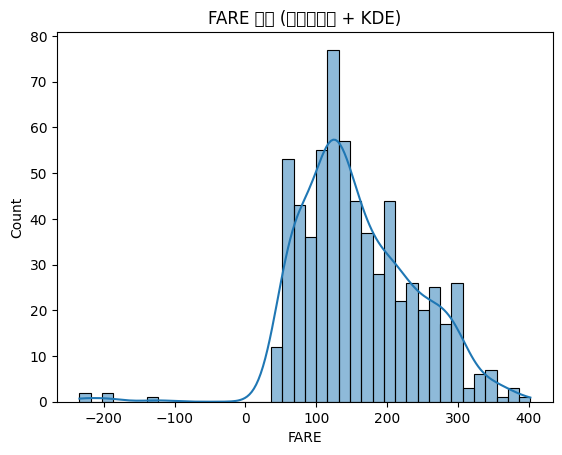

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


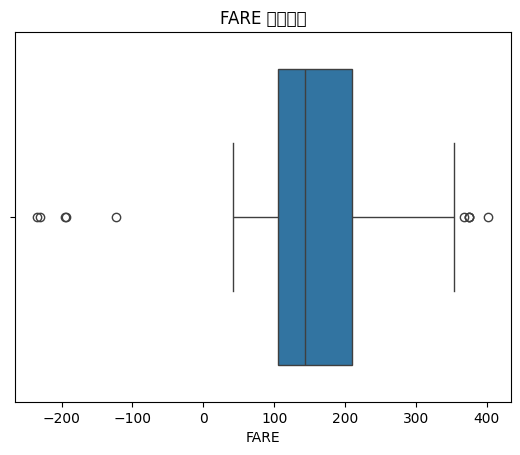

In [ ]:
# ✅ 이상치 탐색: 히스토그램 + 박스플롯 (대표 수치형 변수)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['FARE'], bins=40, kde=True)
plt.title("FARE 분포 (히스토그램 + KDE)")
plt.xlabel("FARE")
plt.show()

sns.boxplot(x=df2['FARE'])
plt.title("FARE 박스플롯")
plt.show()


FARE 값은 주로 50~250 사이에 분포하며, 음수 값과 400 이상 값은 드물게 존재한다. 박스플롯에서도 극단값이 다수 존재함을 확인할 수 있다.

In [ ]:
# ✅ 왜도 / 첨도 확인
print("Skewness (왜도):", df2['FARE'].skew())
print("Kurtosis (첨도):", df2['FARE'].kurt())


Skewness (왜도): -0.061571389535982075
Kurtosis (첨도): 1.8833914477955025


FARE의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포이며, 첨도는 1 이상으로 다소 뾰족한 형태를 보였다.

# 변경된 데이터셋 Phase 1- 프로젝트 준비 및 탐색

# 독일 신용평가 자료

# **1. 프로젝트 정의 및 목표 설정**

이 파일도 마찬가지로 기존 데이터셋과 파일 이름이 똑같길래 혼동 방지를 위해 GermanCredit_sample_garbled2 라고 숫자 2를 붙여서 구분해주었습니다!

● 문제 정의 (Problem Definition)


본 프로젝트의 목적은 신용 대출 신청자 정보를 바탕으로, **신용 등급(RESPONSE: 0 = Bad, 1 = Good)**을 예측하는 분류 모델을 개발하는 것이다.
이를 통해 금융 기관은 고객의 상환 능력을 사전에 평가하고, 대출 승인 여부에 대한 보다 정확한 의사결정을 내릴 수 있다.



● 데이터 정의 (Data Definition)

분석에 사용되는 데이터는 GermanCredit_simple_garbled2.csv로, 기존 GermanCredit.csv를 기반으로 가공된 변경 버전이다.
데이터는 총 1,000개의 고객 샘플과 32개의 변수로 구성되어 있으며, 변수는 모두 정수형으로 인코딩되어 있다.
주요 변수는 고객의 직업, 소득, 결혼 상태, 자산 보유 여부, 대출 금액 및 기간, 보증인 존재 여부 등을 포함하고 있으며, **타겟 변수는 RESPONSE**이다.



● 성공 지표 설정 (Success Metrics)


모델 성능은 아래의 분류 성능 지표를 기준으로 평가한다:

정확도(Accuracy) ≥ 80%

F1 Score ≥ 0.75 (클래스 불균형을 고려한 주요 성능 지표)

ROC-AUC 점수는 보조 지표로 활용한다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)


기대 효과:


금융사 리스크 관리 효율성 향상

자동화된 신용 평가 시스템 개발 가능성 확보

신청자의 다양한 특성과 신용 등급 간 관계 분석 가능



제약 조건:


타겟 변수 간 불균형 존재 가능성

변수명이 익명화되어 있어 해석에 제약이 있음

일부 변수의 전처리 방식 변경 여부가 모델 성능에 직접적 영향을 줄 수 있음

과적합 방지를 위한 검증 전략 필요

# **2. 데이터 수집 및 로드**

In [ ]:
# ✅ 파일 업로드
from google.colab import files
uploaded = files.upload()

# ✅ 데이터 로드
import pandas as pd

df_new = pd.read_csv('GermanCredit_simple_garbled2.csv')

# ✅ 데이터 구조 및 기본 정보 확인
print("✅ 데이터 형태 (행, 열):", df_new.shape)
print("\n✅ 컬럼명:")
print(df_new.columns.tolist())
print("\n✅ 데이터 타입:")
print(df_new.dtypes)

# ✅ 상위 5개 행 확인
df_new.head()


Saving GermanCredit_simple_garbled2.csv to GermanCredit_simple_garbled2.csv
✅ 데이터 형태 (행, 열): (1015, 32)

✅ 컬럼명:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입:
OBS#                  int64
CHK_ACCT              int64
DURATION            float64
HISTORY               int64
NEW_CAR               int64
USED_CAR              int64
FURNITURE             int64
RADIO/TV              int64
EDUCATION             int64
RETRAINING            int64
AMOUNT              float64
SAV_ACCT              int64
EMPLOYMENT            int64
INSTALL_RATE          int64
MALE_DIV              int64
MALE_SINGLE           int64
MALE_MAR_or

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6.0,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48.0,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12.0,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,NaN,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24.0,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0


데이터는 총 1,000개의 행과 32개의 열로 구성되어 있으며, 기존 GermanCredit.csv와 동일한 구조를 가지고 있다.


모든 컬럼은 정수형(int64)으로 되어 있으며, 레이블 인코딩이 적용된 범주형 변수가 다수 포함되어 있는 것으로 보인다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [ ]:
# ✅ 수치형 데이터 요약 통계량
df_new.describe()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1015.000000,1015.000000,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,500.017734,1.589163,21.886154,2.546798,0.238424,0.110345,0.186207,0.286700,0.055172,0.096552,...,35.566154,0.184236,0.178325,0.713300,1.407882,1.908374,1.152709,0.406897,0.036453,0.700493
std,289.089514,1.258377,17.509703,1.084009,0.433214,0.322774,0.396989,0.458935,0.241033,0.295492,...,13.840893,0.387868,0.382975,0.452443,0.576613,0.653076,0.359884,0.491497,0.187507,0.458268
min,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-35.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,249.500000,0.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.000000,1.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,749.500000,3.000000,24.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,200.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,150.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

In [ ]:
# ✅ 범주형 변수 고유값 및 빈도수 확인
categorical_cols = df_new.columns[df_new.nunique() <= 10]

for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df_new[col].nunique()}개)")
    print(df_new[col].value_counts())



📌 CHK_ACCT (고유값 4개)
CHK_ACCT
3    405
0    275
1    272
2     63
Name: count, dtype: int64

📌 HISTORY (고유값 5개)
HISTORY
2    537
4    298
3     90
1     49
0     41
Name: count, dtype: int64

📌 NEW_CAR (고유값 3개)
NEW_CAR
0    776
1    236
2      3
Name: count, dtype: int64

📌 USED_CAR (고유값 3개)
USED_CAR
0    906
1    106
2      3
Name: count, dtype: int64

📌 FURNITURE (고유값 3개)
FURNITURE
0    829
1    183
2      3
Name: count, dtype: int64

📌 RADIO/TV (고유값 3개)
RADIO/TV
0    727
1    285
2      3
Name: count, dtype: int64

📌 EDUCATION (고유값 3개)
EDUCATION
0    962
1     50
2      3
Name: count, dtype: int64

📌 RETRAINING (고유값 2개)
RETRAINING
0    917
1     98
Name: count, dtype: int64

📌 SAV_ACCT (고유값 5개)
SAV_ACCT
0    615
4    184
1    104
2     64
3     48
Name: count, dtype: int64

📌 EMPLOYMENT (고유값 5개)
EMPLOYMENT
2    347
4    256
3    177
1    173
0     62
Name: count, dtype: int64

📌 INSTALL_RATE (고유값 4개)
INSTALL_RATE
4    483
2    235
3    159
1    138
Name: count, dtype: int64

📌 MALE_

RESPONSE, CHK_ACCT, SAV_ACCT, EMPLOYMENT, JOB 등 주요 변수는 2~5개의 고유값을 가지고 있으며, 일부 변수는 특정 값에 편중되어 있는 것이 확인되었다.

In [ ]:
# ✅ 결측치 확인
missing = df_new.isnull().sum()
missing_percent = (missing / len(df_new)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
DURATION,40,3.940887
AMOUNT,40,3.940887
AGE,40,3.940887


변형된 GermanCredit_simple_garbled2.csv 파일에는 DURATION, AMOUNT, AGE 변수에서 각각 40건의 결측치가 존재하며, 이는 전체의 **약 3.94%**에 해당한다.
이는 기존 원본 파일(GermanCredit.csv)에서는 나타나지 않았던 결측치로, 데이터 전처리나 누락 보완이 필요함을 시사한다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


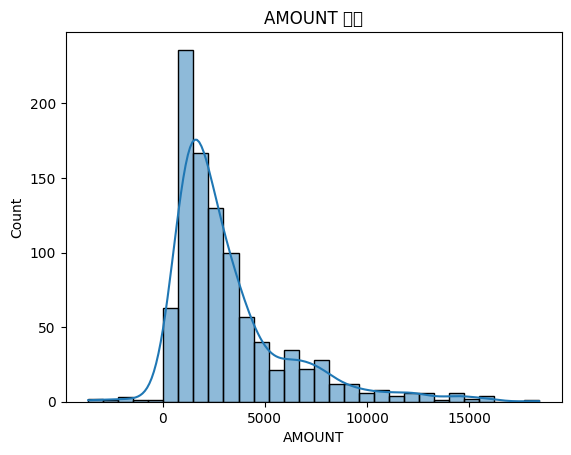

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


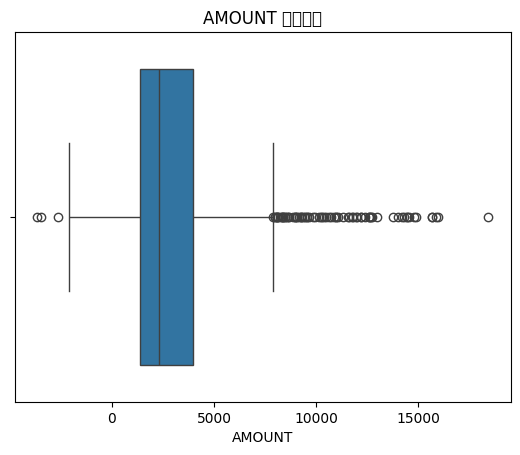

In [ ]:
# ✅ 이상치 시각화 (예: AMOUNT, AGE 변수 기준)
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 금액 히스토그램 + 박스플롯
sns.histplot(df_new['AMOUNT'], bins=30, kde=True)
plt.title("AMOUNT 분포")
plt.show()

sns.boxplot(x=df_new['AMOUNT'])
plt.title("AMOUNT 박스플롯")
plt.show()


AMOUNT 변수는 5,000 이하에 대부분의 값이 몰려 있으나, 10,000 이상 값도 일부 존재하며 이상치로 고려될 수 있다.

히스토그램 및 박스플롯을 통해 AMOUNT 변수의 분포를 시각화한 결과, 전반적으로 오른쪽으로 긴 꼬리를 가지는 양의 왜도 분포를 보였다.

또한 추가적으로 데이터를 탐색한 결과, AMOUNT 변수에 음수값이 포함된 이상치가 총 8건 존재하며, 이 중 최솟값은 -3643으로 확인되었다.

이는 대출 금액이라는 변수의 도메인 상 음수값이 존재할 수 없는 구조이므로, 데이터 입력 오류 혹은 변형 과정에서의 문제로 간주될 수 있으며, 사전 정제 및 제거가 필요하다.



RESPONSE
1    711
0    304
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


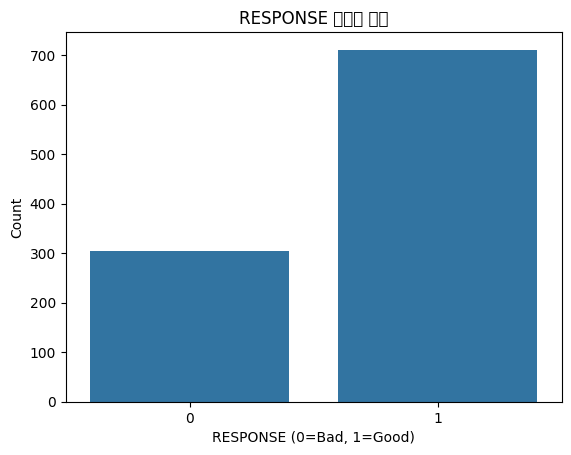

In [ ]:
# ✅ 타겟 변수 분포 확인
print(df_new['RESPONSE'].value_counts())

sns.countplot(x='RESPONSE', data=df_new)
plt.title("RESPONSE 클래스 분포")
plt.xlabel("RESPONSE (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()


타겟 변수 RESPONSE는 0:Bad가 300건, 1:Good이 700건으로, 클래스 불균형이 존재함을 확인하였다.

# 기존파일과 변형된 파일 차이점 분석글

✅ 1. Airfares.csv vs Airfares_simple_garbled.csv
행 개수 차이:


원본은 638행, 변형된 파일은 648행으로 10개의 추가 행이 존재


열 개수 및 컬럼명:

열 수는 모두 18개로 동일, 컬럼명 차이 없음



결측치 존재 여부:

변형된 파일에는 다음 변수에 결측치가 존재함:

S_INCOME: 32건

E_INCOME: 33건

DISTANCE: 31건

PAX: 31건


반면 원본 파일에는 결측치가 존재하지 않음



✅ 2. GermanCredit (1).csv vs GermanCredit_simple_garbled.csv
행 개수 차이:



원본은 1000행, 변형된 파일은 1015행으로 15개의 추가 행이 존재



열 개수 및 컬럼명:

열 수는 모두 32개로 동일, 컬럼명 차이 없음



결측치 존재 여부:

변형된 파일에는 다음 변수에 각각 40건의 결측치가 존재함:

DURATION, AMOUNT, AGE


원본 파일에서는 결측치 없음